In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-prediction/fraud test.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.shape

(555719, 23)

In [5]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
df = df.drop('Unnamed: 0', axis = 1)

## is_fraud

is_fraud
0    553574
1      2145
Name: count, dtype: int64

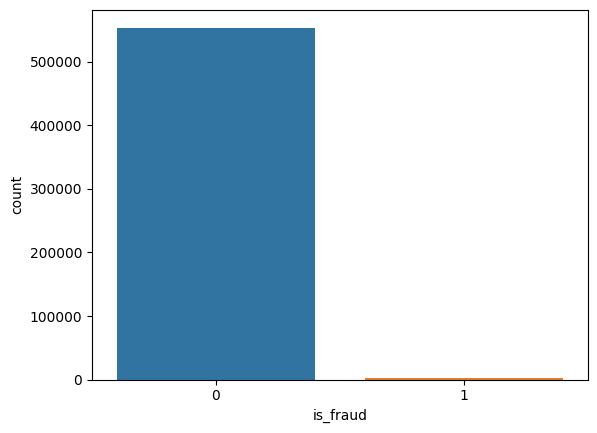

In [11]:
sns.countplot(x = 'is_fraud', data = df)
df['is_fraud'].value_counts()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amt', ylabel='Count'>

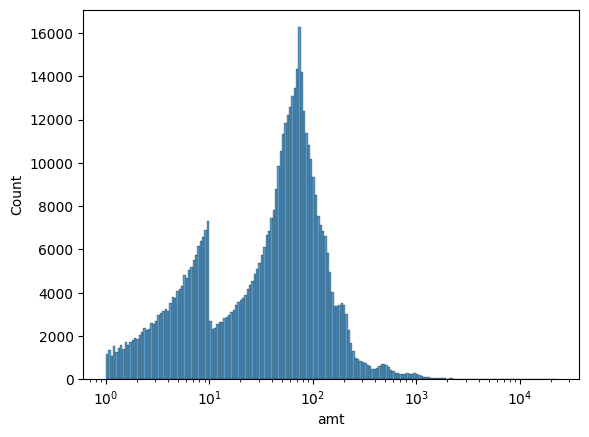

In [12]:
sns.histplot(df['amt'], log_scale = True)

<Axes: xlabel='gender', ylabel='count'>

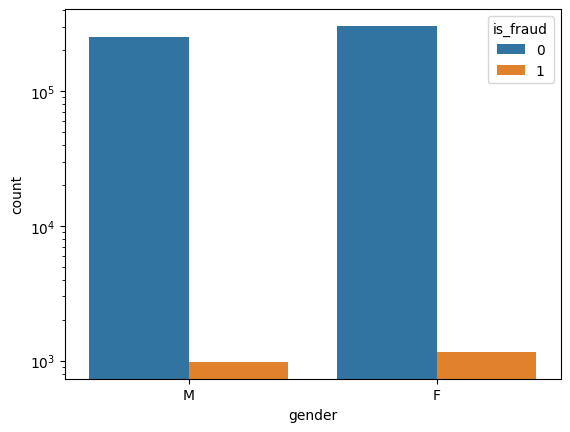

In [13]:
sns.countplot(x = 'gender', data = df, hue = 'is_fraud', log = True)

## Cleaning unwanted data

In [14]:
df = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'],axis = 1)

In [15]:
from datetime import datetime

df['dob'] = pd.to_datetime(df['dob'], dayfirst = True)
current_date = datetime.now()
df['Age'] = (current_date - df['dob']).dt.days // 365

In [16]:
df = df.drop('dob', axis = 1)

In [17]:
df_encoded = pd.get_dummies(df, columns = ['category', 'gender'],dtype = int, drop_first = True)

In [18]:
X = df_encoded.drop('is_fraud', axis = 1)

In [19]:
y = df_encoded['is_fraud']

## TrainTestSplit

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

## Imbalanced Data

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto')

In [22]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [23]:
X_train = X_resampled
y_train = y_resampled

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

### ANN

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import tensorflow as tf

2024-03-23 18:01:29.869873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 18:01:29.870035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 18:01:30.033785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
tf.random.set_seed(111)
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer = Adam(), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.3, callbacks = [early_stopping])

Epoch 1/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9017 - loss: 0.2327 - val_accuracy: 0.8941 - val_loss: 0.2373
Epoch 2/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9525 - loss: 0.1184 - val_accuracy: 0.8922 - val_loss: 0.2095
Epoch 3/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9563 - loss: 0.1064 - val_accuracy: 0.9110 - val_loss: 0.1825
Epoch 4/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9583 - loss: 0.0999 - val_accuracy: 0.9071 - val_loss: 0.2003
Epoch 5/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9594 - loss: 0.0956 - val_accuracy: 0.9123 - val_loss: 0.1856
Epoch 6/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9611 - loss: 0.0914 - val_accuracy: 0.9135 - val_loss: 0.1753
Epoch 7/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9628 - loss: 0.0874 - val_accuracy: 0.9228 - val_loss: 0.1544
Epoch 8/20
16953/16953 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

In [30]:
model.evaluate(X_test, y_test)

5210/5210 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9818 - loss: 0.0469


[0.046977460384368896, 0.9813994765281677]

## Ploting the training and validation loss curves

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

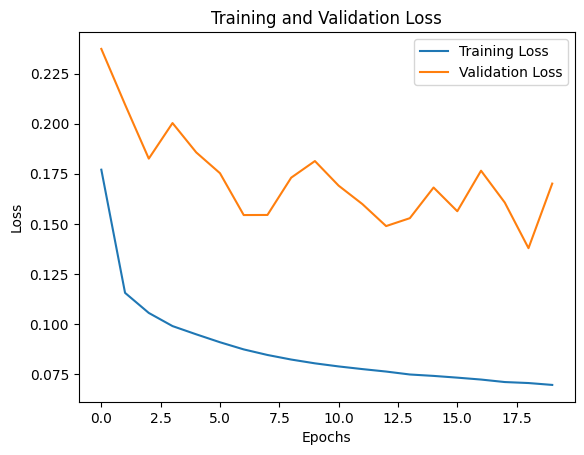

In [32]:
epochs = range(1, len(train_loss) + 1)
plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Confusion Matrix and Classification Report

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_pred_prob = model.predict(X_test)

threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

5210/5210 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [36]:
print(confusion_matrix(y_test, y_pred))

[[163077   3005]
 [    96    538]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    166082
           1       0.15      0.85      0.26       634

    accuracy                           0.98    166716
   macro avg       0.58      0.92      0.62    166716
weighted avg       1.00      0.98      0.99    166716

